#### [프로젝트]
## 모두카페 꼼꼼히 살펴보기
---
+ 코더 : 노현정
+ 작성일 : 23-09-15

### 1. 상황 인식

+ '모두카페'라는 작은 스터디 카페를 하나 운영
+ '모두카페'의 매출 추세나 음료와 음식별 판매금액 같은 데이터를 분석
+ '모두카페'가 더 잘되기 위한 운영 전략을 제시

+ 데이터 
    + `entry_data`: '모두 스터디카페'의 `시간별 입장 기록` 데이터
    + `sales_data`: '모두 스터디카페'의 `시간별 음식/음료 판매` 데이터
    + `item_data`: '모두 스터디카페'에서 판매하고 있는 `음식/음료 종류와 가격`
    + `item_entry_data`: '모두 스터디카페'에서 판매하고 있는 `입장권 종류와 가격`


+ 시각화 필수
    + 월별 매출액 추세
    + 가장 인기있는 음식/음료
    + 가장 많이 팔린 입장권 종류

### 2. 문제 정의

+ 모두카페의 상태는 어떤가?

### 3. 데이터 분석


#### 1) 데이터 불러오기

In [2]:
# 필요 라이브러리 호출하기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')

import os
# 로컬용
os.environ['AIFFEL_PYDATA'] = '\\Users\\qwert\\aiffel\\workspace\\first-repository\\Data'
train_data_path = os.getenv('AIFFEL_PYDATA')+'/training'

In [3]:
# 데이터 호출하기 - 로컬용
entry_data = pd.read_csv(train_data_path+'/entry_data.csv')
sales_data = pd.read_csv(train_data_path+'/sales_data.csv')
item_data = pd.read_csv(train_data_path+'/item_data.csv')
item_entry_data = pd.read_csv(train_data_path+'/item_entry_data.csv')

In [ ]:
# 데이터 호출하기 - 클라우드용
entry_data = pd.read_csv('/aiffel/data/entry_data.csv')
sales_data = pd.read_csv('/aiffel/data/sales_data.csv')
item_data = pd.read_csv('/aiffel/data/item_data.csv')
item_entry_data = pd.read_csv('/aiffel/data/item_entry_data.csv')

In [3]:
# entry_data 데이터 정보 확인하기
entry_data.head()

,요금제명,입실,퇴실,이용,위치,금액,구분,고객
0,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
1,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
2,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
3,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
4,한국대생 무제한 입장권,2022-04-01 19:54,2022-04-01 22:28,오전 2:33:00,선불기2,7400,퇴실,customer388928


In [9]:
# item_data 데이터 정보 확인하기
item_data.head()

,구분,분류,상품명,판매금액
0,1,게임&TV,이어폰(커널형),"3,000원"
1,2,디저트,초코머핀,"3,500원"
2,3,디저트,쿠키(초코칩),"1,500원"
3,4,디저트,쿠키(마카다미아),"1,500원"
4,5,디저트,미니마카롱(3개),"2,000원"


In [10]:
# item_entry_data 데이터 정보 확인하기
item_entry_data.head()

,순위,분류,상품명,판매금액
0,1,한국대생,한국대생 요금제,"2,000원"
1,2,심야-조조,심야-조조 요금제,"5,000원"
2,3,일반인,일반요금제,"2,500원"
3,4,한국대생,한국대생 요금제,"2,500원"
4,5,일반인,일반요금제,"2,000원"


In [8]:
sales_data.head()

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,"4,500",customer275507
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,"5,500",customer275507
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,"4,000",customer275507
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,"1,000",customer275507
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,"5,000",customer275507


### 2) 데이터 분석하기
+ 필수 문제1 : 월별 매출액 추세(sales_data를 이용합니다.)
+ 월별 매출액 추세를 집계하고 그 결과를 시각화해봅니다.
+ 힌트: groupby() 함수를 사용하세요.





In [ ]:
sales_data['결제일시'][:7]

In [35]:
sales_data['결제일시'].str[0:7]

0       2022-04
1       2022-04
2       2022-04
3       2022-04
4       2022-04
         ...   
7100    2021-02
7101    2021-02
7102    2021-02
7103    2021-02
7104    2021-02
Name: 결제일시, Length: 7105, dtype: object

##### 문제 1: 월별 매출액 추세


+ 활용할 데이터(sales_data)를 temp_var로 정의하기
+ temp_var의 date열을 만들고, sales_date의 결제일시 중 앞에서 7번째 값까지 할당


In [4]:
# 활용할 데이터(sales_data)를 temp_var로 정의하기
temp_var = sales_data.copy()

# temp_var의 date열을 만들고, sales_date의 결제일시 중 앞에서 7번째 값까지 할당
temp_var['date'] = sales_data['결제일시'].str[0:7]

+ salse_data의 결제금액에는 쉼표(,)가 들어있어서 현재 문자열로 인식되고 있어요. 따라서 쉼표를 지우고, 문자열을 숫자로 바꿔줘야 합니다.






In [53]:
# 두 개 다 적용되지 않음.
temp_var['결제금액'].replace(',','')
temp_var['결제금액'].replace(to_replace=',',value='',inplace=True)

# str속성을 이용하여 변경한 후 컬럼에 저장
temp_var['결제금액'].str.replace(',','')

0        4500
1        5500
2        4000
3        1000
4        5000
        ...  
7100    -3500
7101     4500
7102    -4500
7103     4000
7104    -4000
Name: 결제금액, Length: 7105, dtype: object

In [5]:
# sales_data의 결제금액에 포함된 쉼표(,) 지우기
temp_var['결제금액'] = temp_var['결제금액'].str.replace(',','')

# sales_data의 결제금액을 숫자형태로 바꾸기
temp_var = temp_var.astype({'결제금액':'int64'})

# temp_var의 payment열을 date 기준으로 집계하기
payment_data = temp_var['결제금액'].groupby(temp_var['date']).agg('sum')


In [32]:
payment_data

date
2021-02       7000
2021-03    2104500
2021-04    3116600
2021-05    2537000
2021-06    3621500
2021-07    1215000
2021-08    1229000
2021-09    1197500
2021-10    2138500
2021-11    2748500
2021-12    3290000
2022-01    1430500
2022-02    1181500
2022-03    1870900
2022-04      49900
Name: 결제금액, dtype: int64

In [41]:
temp_var.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7105 entries, 0 to 7104
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   결제일시    7105 non-null   object
 1   판매위치    7105 non-null   object
 2   상품명     7105 non-null   object
 3   결제방식    7105 non-null   object
 4   비고      7105 non-null   object
 5   판매수량    7105 non-null   int64 
 6   결제금액    7105 non-null   int32 
 7   고객      6300 non-null   object
 8   date    7105 non-null   object
dtypes: int32(1), int64(1), object(7)
memory usage: 471.9+ KB


In [62]:
payment_data.index

Index(['2021-02', '2021-03', '2021-04', '2021-05', '2021-06', '2021-07',
       '2021-08', '2021-09', '2021-10', '2021-11', '2021-12', '2022-01',
       '2022-02', '2022-03', '2022-04'],
      dtype='object', name='date')

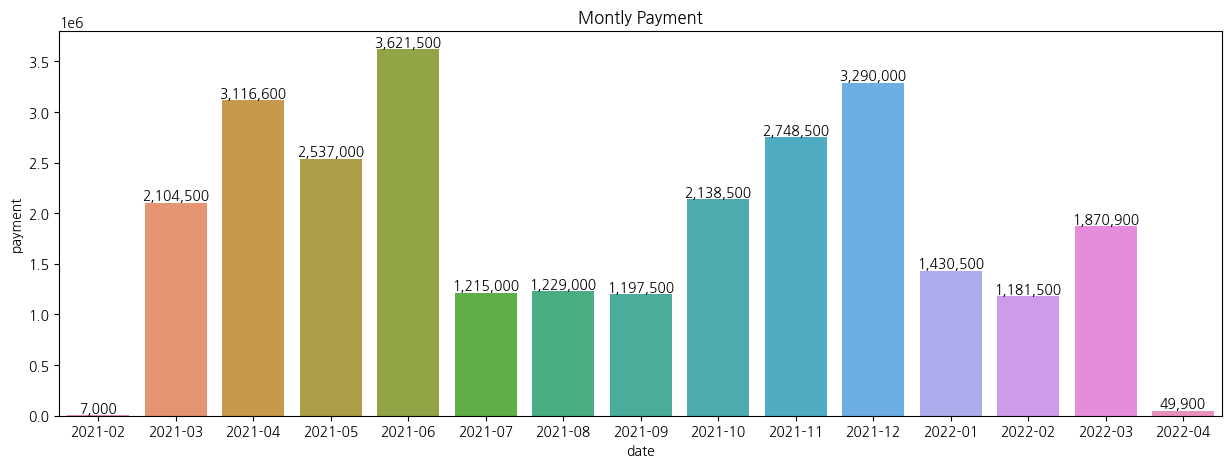

In [130]:
# 집계 결과를 시각화하기
plt.figure(figsize=(15,5))
ax = sns.barplot(x=payment_data.index, y=payment_data)
containers = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues])
plt.ylabel('payment')
plt.title('Montly Payment')
plt.show()

##### 필수 문제2: 가장 인기 있는 음식/음료(sales_data를 이용합니다.)
+ 여러 메뉴들(음식,음료)을 판매 개수 순으로 정렬하고 상위 10개를 뽑아 결과를 시각화해봅니다.
+ 힌트: value_counts() 함수를 사용하세요.





In [6]:
# temp_var의 상품명을 value_counts를 이용해 집계하기
# 주의! value_counts로 바로 집계하면 판매취소와 결제취소가 함께 집계됩니다.
# 따라서 '판매수량' 칼럼 값이 '-1'인 데이터를 제외하고 집계해야 합니다.
# 힌트 코드 : temp_var[temp_var['판매수량']==-1]
items_count = temp_var[temp_var['판매수량']!=-1]['상품명'].value_counts()

# 집계 결과를 데이터프레임으로 변환하고, 상위 10개 선정하기
items_top10 = items_count.sort_values(ascending=False).head(10)
items_top10

김치볶음밥         1204
라면             749
짜장라면           455
치즈불고기볶음밥       420
계란추가           314
낙지볶음밥          312
새우볶음밥          309
아메리카노(ICE)     284
치즈감자튀김         246
감자튀김           242
Name: 상품명, dtype: int64

In [11]:
# 한글이 포함된 시각화를 위해 Matplotlib 설정
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 로컬용 
fontpath = 'C:/Windows/Fonts/NanumGothic.ttf'
plt.rc('font', family='NanumGothic') 
# plt.rc(mpl.rcParams['font.family'])


# 클라우드용
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
plt.rc('font', family='NanumBarunGothic') 

font = fm.FontProperties(fname=fontpath, size=9)
mpl.font_manager.findfont(font)
print("완료!")

완료!


##### 한글폰트가 되지 않는 에러 발생
+ 로컬 내에 설치되어있는 다른 한글 폰트 목록을 확인하고 변경

In [11]:
print(mpl.matplotlib_fname())
print(mpl.get_cachedir())

c:\Users\qwert\anaconda3\lib\site-packages\matplotlib\mpl-data\matplotlibrc
C:\Users\qwert\.matplotlib


In [12]:
[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Nanum' in f.name]

[('NanumGothic', 'C:\\Windows\\Fonts\\NanumGothicExtraBold.ttf'),
 ('NanumMyeongjo', 'C:\\Windows\\Fonts\\NanumMyeongjoBold.ttf'),
 ('NanumGothic', 'C:\\Windows\\Fonts\\NanumGothicBold.ttf'),
 ('NanumMyeongjo', 'C:\\Windows\\Fonts\\NanumMyeongjoExtraBold.ttf'),
 ('NanumMyeongjo', 'C:\\Windows\\Fonts\\NanumMyeongjo.ttf'),
 ('NanumGothic', 'C:\\Windows\\Fonts\\NanumGothic.ttf'),
 ('NanumGothic', 'C:\\Windows\\Fonts\\NanumGothicLight.ttf')]

c:\Users\qwert\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\qwert\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54408 (\N{HANGUL SYLLABLE PUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\qwert\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47749 (\N{HANGUL SYLLABLE MYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\qwert\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44608 (\N{HANGUL SYLLABLE GIM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\qwert\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 52824 (\N{HANGUL SYLLABLE CI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\qwert\anacond

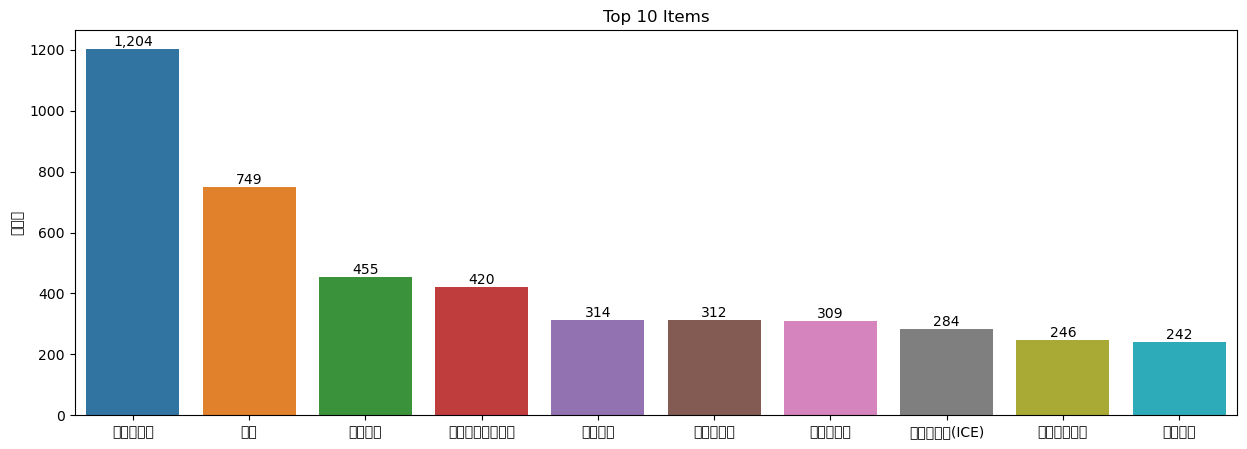

In [10]:
# 집계 결과를 시각화하기
plt.figure(figsize=(15,5))
ax = sns.barplot(x=items_count.index, y=items_count)
containers = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues])
plt.title('Top 10 Items')
plt.show()

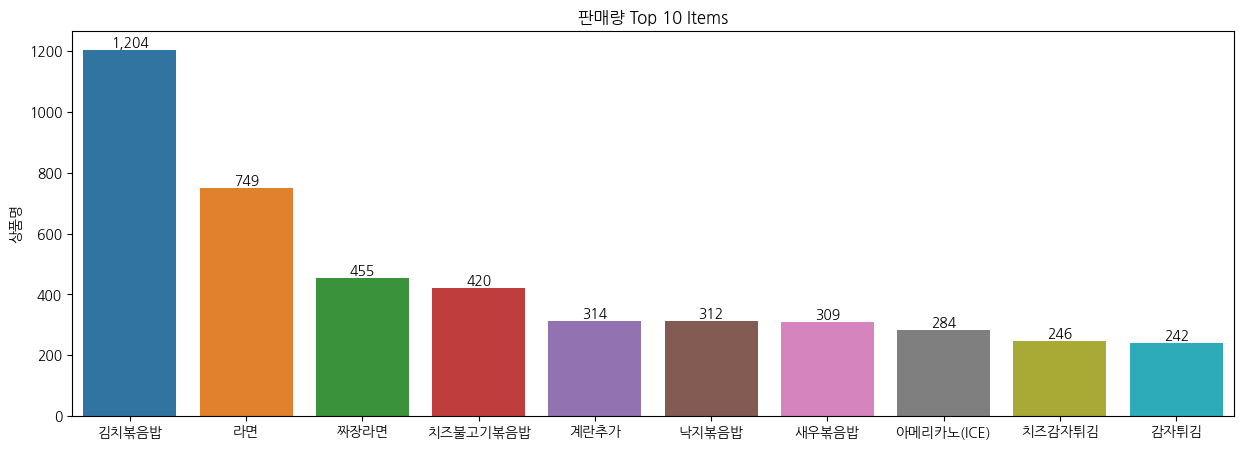

In [133]:
# 집계 결과를 시각화하기
plt.figure(figsize=(15,5))
ax = sns.barplot(x=items_top10.index, y=items_top10)
containers = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues])
plt.title('판매량 Top 10 Items')
plt.show()

In [23]:
temp_var.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7105 entries, 0 to 7104
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   결제일시    7105 non-null   object
 1   판매위치    7105 non-null   object
 2   상품명     7105 non-null   object
 3   결제방식    7105 non-null   object
 4   비고      7105 non-null   object
 5   판매수량    7105 non-null   int64 
 6   결제금액    7105 non-null   int64 
 7   고객      6300 non-null   object
 8   date    7105 non-null   object
dtypes: int64(2), object(7)
memory usage: 499.7+ KB


+ 여러 메뉴들(음식,음료)을 판매 매출(판매 개수 x 결제 금액) 순으로 정렬하고 상위 10개를 뽑아 결과를 시각화해봅니다.
+ 힌트: value_counts() 함수를 사용하세요.

In [134]:
items_payment

,상품명,결제금액
0,(면)계란추가-국물라면,5000
1,(면)계란후라이 추가-불닭/짜장,20000
2,(면)치즈추가,10500
3,(밥)계란후라이 추가,3000
4,(밥)슈레드치즈추가,4500
...,...,...
95,한돈간장불고기덮밥,112500
96,한돈고추장불고기덮밥,127500
97,허니밀크쉐이크,108500
98,헤이즐넛라떼(HOT),9000


In [145]:
items_count = temp_var.groupby('상품명')['결제금액'].value_counts()
items_count


상품명                결제금액 
(면)계란추가-국물라면        500     10
(면)계란후라이 추가-불닭/짜장   1000    20
(면)치즈추가             500     21
(밥)계란후라이 추가         1000     3
(밥)슈레드치즈추가          1500     3
                            ..
헤이즐넛라떼(HOT)         4500     2
헤이즐넛라떼(ICE)         5000    13
                   -5000     1
                    0        1
                    2500     1
Name: 결제금액, Length: 256, dtype: int64

In [8]:
# temp_var의 payment열을 상품명을 기준으로 집계하기
items_payment = temp_var.groupby('상품명')['결제금액'].sum().reset_index()

# item_payment의 값을 내림차순으로 정렬하고 상위 10개 도출하기
pay_top10 = items_payment.sort_values(by='결제금액',ascending=False).head(10)

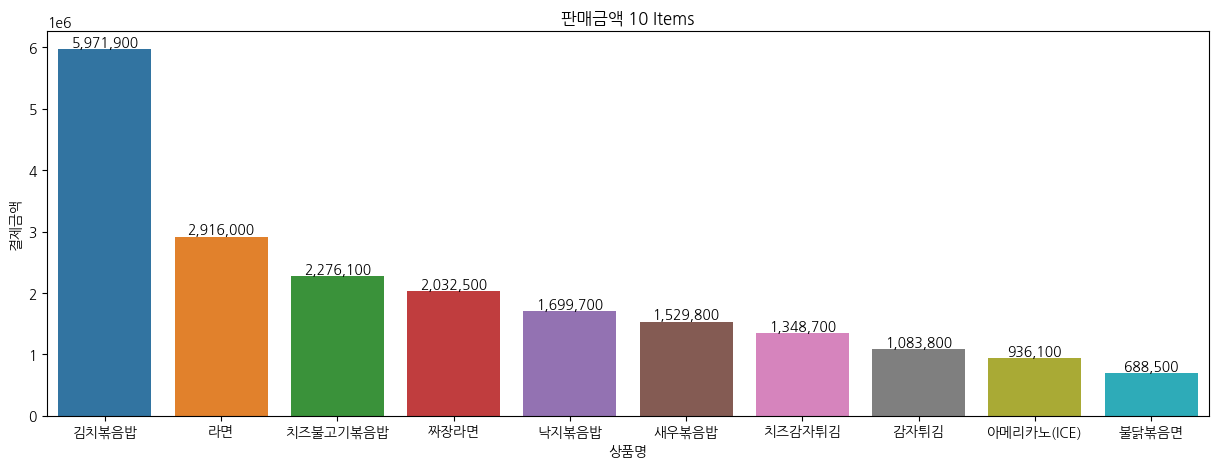

In [112]:
# 집계 결과를 시각화하기
plt.figure(figsize=(15,5))
ax = sns.barplot(data =pay_top10, x='상품명', y='결제금액')
containers = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues])
plt.title('판매금액 10 Items')
plt.show()

##### 필수 문제3: 가장 많이 팔린 입장권 종류(entry_data를 이용합니다.)
+ 여러 입장권 종류를 판매 매출(판매 개수 x 금액) 순으로 정렬하고 상위 10개를 뽑아 결과를 시각화해봅니다.
+ 힌트: value_counts() 함수를 사용하세요.





In [77]:
item_entry_data.head()

,순위,분류,상품명,판매금액
0,1,한국대생,한국대생 요금제,"2,000원"
1,2,심야-조조,심야-조조 요금제,"5,000원"
2,3,일반인,일반요금제,"2,500원"
3,4,한국대생,한국대생 요금제,"2,500원"
4,5,일반인,일반요금제,"2,000원"


In [87]:
len(item_entry_data)

34

In [89]:
set(item_entry_data['분류']+' / '+item_entry_data['상품명'])

{'18시이후 / 거리두기4단계',
 '18시이후 / 마감요금',
 '기본 / 기본요금제',
 '기본그룹 / 기본요금제',
 '심야-조조 / 심야-조조 요금제',
 '심야-조조 / 추석당일 요금제',
 '일반인 / 일반요금제',
 '한국대생 / 한국대생 요금제'}

In [80]:
entry_data['요금제명'].unique()

array(['시간요금제(1시간)', '무제한 입장권', '한국대생 무제한 입장권', '기간권', '시간요금제(3시간)',
       '심야-조조무제한', '시간권', nan, '입장권(종일권)', '한국대생 입장권(종일권)', '1시간',
       '조조무제한', '18시이후 무제한', '3시간', '심야-조조무제한(06시까지)', '이용권',
       '시간 요금제(1시간당)', '시간요금제(1시간당)', '무제한(한국대생)', '1시간 요금제', '무제한(일반요금)',
       '종일요금제', '시간요금제'], dtype=object)

In [90]:
print(len(entry_data))
entry_data.head()

22555


,요금제명,입실,퇴실,이용,위치,금액,구분,고객
0,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
1,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
2,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
3,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
4,한국대생 무제한 입장권,2022-04-01 19:54,2022-04-01 22:28,오전 2:33:00,선불기2,7400,퇴실,customer388928


In [117]:
tickets

요금제명
18시이후 무제한           1330500
1시간                   90000
1시간 요금제               14000
3시간                   21000
기간권                       0
무제한 입장권             1568600
무제한(일반요금)              6000
무제한(한국대생)             14000
시간 요금제(1시간당)          25000
시간권                       0
시간요금제                 12300
시간요금제(1시간)          2665500
시간요금제(1시간당)           22500
시간요금제(3시간)          2042000
심야-조조무제한            6221000
심야-조조무제한(06시까지)    11600000
이용권                       0
입장권(종일권)           23570500
조조무제한                693000
종일요금제                233000
한국대생 무제한 입장권        5207500
한국대생 입장권(종일권)      70037000
Name: 금액, dtype: int64

In [120]:
temp_var.groupby('요금제명')['금액'].count().sort_values(ascending=False)

요금제명
한국대생 입장권(종일권)      11297
입장권(종일권)            3498
심야-조조무제한(06시까지)     2320
심야-조조무제한            1223
시간요금제(1시간)          1048
기간권                 1034
한국대생 무제한 입장권         714
시간요금제(3시간)           289
18시이후 무제한            251
무제한 입장권              198
조조무제한                161
시간권                  138
종일요금제                 37
1시간                   36
이용권                   14
시간 요금제(1시간당)          10
시간요금제(1시간당)            9
1시간 요금제                7
3시간                    3
시간요금제                  2
무제한(한국대생)              2
무제한(일반요금)              1
Name: 금액, dtype: int64

In [9]:
# 문제 3: 가장 많이 팔린 입장권 종류
# 활용할 데이터(entry_data)를 temp_var로 정의하기
temp_var = entry_data.copy()

# temp_var의 금액을 숫자형태로 변환하기
temp_var = temp_var.astype({'금액':'int64'})

# temp_var의 금액을 요금제명을 기준으로 집계하기
tickets = temp_var.groupby('요금제명')['금액'].sum()

# tickets의 값을 내림차순으로 정렬하고 상위 10개 도출하기
tickets_top10 = tickets.sort_values(ascending=False).head(10)
tickets_top10

요금제명
한국대생 입장권(종일권)      70037000
입장권(종일권)           23570500
심야-조조무제한(06시까지)    11600000
심야-조조무제한            6221000
한국대생 무제한 입장권        5207500
시간요금제(1시간)          2665500
시간요금제(3시간)          2042000
무제한 입장권             1568600
18시이후 무제한           1330500
조조무제한                693000
Name: 금액, dtype: int64

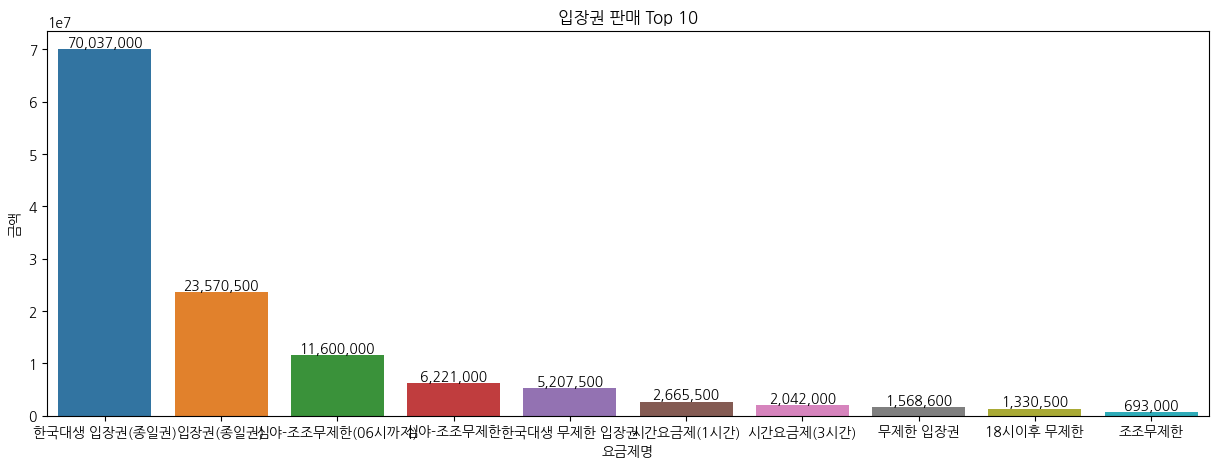

In [12]:
# 집계 결과를 시각화하기
plt.figure(figsize=(15,5))
ax = sns.barplot( x=tickets_top10.index, y=tickets_top10)
containers = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues])
plt.title('입장권 판매 Top 10')
plt.show()

##### 내가 정의한 문제 해결하기
---
1. 월별 인기메뉴
1. 인기없는 메뉴 확인
1. 티켓 판매 분포 확인





+ ①  월별 상품 매출 현황


In [158]:
# 활용할 데이터(sales_data)를 temp_var로 정의하기
temp_var = sales_data.copy()

# temp_var의 date열을 만들고, sales_date의 결제일시 중 앞에서 7번째 값까지 할당
temp_var['date'] = sales_data['결제일시'].str[0:7]

# sales_data의 결제금액에 포함된 쉼표(,) 지우기
temp_var['결제금액'] = temp_var['결제금액'].str.replace(',','')

# sales_data의 결제금액을 숫자형태로 바꾸기
temp_var = temp_var.astype({'결제금액':'int64'})


In [172]:
monthly_aggregated = temp_var.groupby(['date','상품명']).agg('결제금액').sum()
monthly_aggregated = pd.DataFrame(monthly_aggregated)
monthly_aggregated

결제금액
date    상품명              
2021-02 아메리카노(HOT)   7000
        카페라떼(HOT)       0
        카페모카(HOT)       0
2021-03 감자튀김        58500
        계란추가        17000
...                   ...
2022-04 순살닭다리덮밥      8000
        아이스티         3900
        짜장라면(계란추가)   5500
        치킨카라아케 6pc   4500
        크로플          5500

[684 rows x 1 columns]

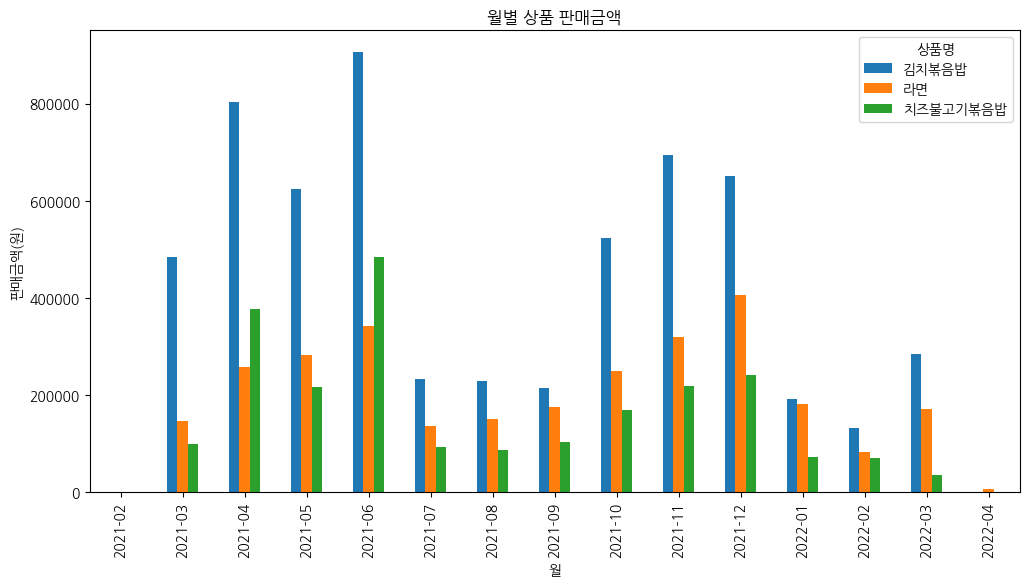

In [173]:
pivot_table = monthly_aggregated.pivot_table(index='date', columns='상품명', values='결제금액', aggfunc='sum')

top_3_products = pivot_table.sum().sort_values(ascending=False).head(3).index
filtered_pivot = pivot_table[top_3_products]

filtered_pivot.plot(kind='bar', stacked=False, figsize=(12, 6))

plt.title('월별 상품 판매금액')
plt.xlabel('월')
plt.ylabel('판매금액(원)')

# 그래프 출력
plt.show()

+ __② 인기없는 품목__
   + 전체 메뉴 수 : 100개 
   + 판매량 하위 30 메뉴 확인
   + 누적 결제금액 5만원 미만 메뉴 : 총 48개
   + 누적 주문횟수 20회 미만 메뉴 : 총 62개
   + 누적 결제금액 5만원 미만이면서 누적 주문횟수 20회 미만 메뉴 : 총 43개


+ 전체 메뉴 수 : 100개

In [31]:
len(items_payment)

100

+ 판매량 하위 30 메뉴 확인

In [153]:
pay_b10 = items_payment.sort_values(by='결제금액',ascending=False).tail(30).reset_index(drop=True)

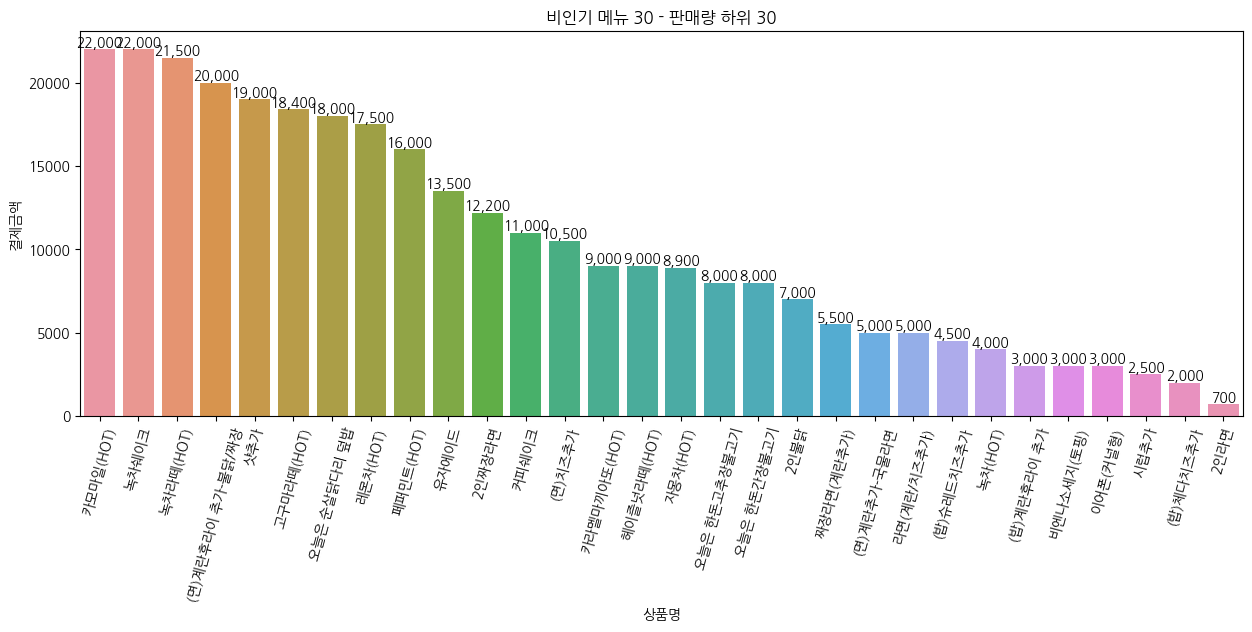

1

In [37]:
plt.figure(figsize=(15,5))
ax = sns.barplot( data=pay_b10, x='상품명', y='결제금액')
containers = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues])
plt.xticks(rotation=75)
plt.title('비인기 메뉴 30 - 판매량 하위 30')
plt.show()
1


+ 누적 결제금액 5만원 미만 메뉴 : 총 48개

In [132]:
under50k= (items_payment['결제금액'].values) < 50000
print('누적 결제금액 5만원 미만 메뉴 : ', under50k.sum(),'개')
under50k_pay_items = items_payment[under50k]['상품명'].values
under50k_pay_items

누적 결제금액 5만원 미만 메뉴 :  48 개


array(['(면)계란추가-국물라면', '(면)계란후라이 추가-불닭/짜장', '(면)치즈추가', '(밥)계란후라이 추가',
       '(밥)슈레드치즈추가', '(밥)체다치즈추가', '2인라면', '2인불닭', '2인짜장라면', '고구마라떼(HOT)',
       '고구마라떼(ICE)', '녹차(HOT)', '녹차(ICE)', '녹차라떼(HOT)', '녹차라떼(ICE)',
       '녹차쉐이크', '라면(계란/치즈추가)', '레몬차(HOT)', '레몬차(ICE)', '망고스무디',
       '민트초코라떼(ICE)', '바닐라라떼(HOT)', '비엔나소세지(토핑)', '샷추가', '시럽추가',
       '오늘은 순살닭다리 덮밥', '오늘은 한돈간장불고기', '오늘은 한돈고추장불고기', '유자에이드', '유자차(HOT)',
       '유자차(ICE)', '이어폰(커널형)', '자몽차(HOT)', '자몽차(ICE)', '짜장라면(계란추가)',
       '청귤커피(HOT)', '초코라떼(HOT)', '치킨카라아케 10pc', '카라멜마끼아또(HOT)',
       '카라멜마끼아또(ICE)', '카모마일(HOT)', '카모마일(ICE)', '카페라떼(HOT)', '카페모카(HOT)',
       '커피쉐이크', '페퍼민트(HOT)', '페퍼민트(ICE)', '헤이즐넛라떼(HOT)'], dtype=object)

+ 누적 주문횟수 20회 미만 메뉴 : 총 62개

In [138]:
print('누적 주문횟수 20회 미만 메뉴 : ', (items_count<20).sum(),'개')
under20_cnt_items= items_count[items_count<20].index
under20_cnt_items

누적 주문횟수 20회 미만 메뉴 :  62 개


Index(['카페라떼(ICE)', '맵단대패삼겹덮밥', '플레인요거트스무디', '블루베리스무디', '크로플', '쿠앤크쉐이크',
       '딸기스무디', '카페라떼(HOT)', '한돈고추장불고기덮밥', '단짠대패삼겹덮밥', '초코쉐이크', '바닐라라떼(HOT)',
       '한돈간장불고기덮밥', '헤이즐넛라떼(ICE)', '만두', '순살닭다리덮밥', '딸기라떼(ICE)', '2인불닭',
       '버팔로윙 6pc', '민트초코칩쉐이크', '레몬차(ICE)', '카모마일(ICE)', '초코라떼(HOT)',
       '유자차(HOT)', '카페모카(HOT)', '아포카토', '(면)계란추가-국물라면', '유자차(ICE)', '자몽차(ICE)',
       '버팔로윙 10pc', '녹차라떼(ICE)', '시럽추가', '고구마라떼(ICE)', '페퍼민트(ICE)',
       '카모마일(HOT)', '망고스무디', '녹차(ICE)', '민트초코라떼(ICE)', '청귤커피(HOT)',
       '카라멜마끼아또(ICE)', '녹차라떼(HOT)', '레몬차(HOT)', '치킨카라아케 10pc', '고구마라떼(HOT)',
       '페퍼민트(HOT)', '유자에이드', '(밥)체다치즈추가', '녹차쉐이크', '커피쉐이크', '비엔나소세지(토핑)',
       '(밥)슈레드치즈추가', '(밥)계란후라이 추가', '자몽차(HOT)', '헤이즐넛라떼(HOT)', '카라멜마끼아또(HOT)',
       '오늘은 순살닭다리 덮밥', '오늘은 한돈고추장불고기', '라면(계란/치즈추가)', '녹차(HOT)', '짜장라면(계란추가)',
       '이어폰(커널형)', '오늘은 한돈간장불고기'],
      dtype='object')

+ 누적 결제금액 5만원 미만이면서 누적 주문횟수 20회 미만 메뉴 : 총 43개

In [148]:
print('총 :' , len(set(under50k_pay_items).intersection(set(under20_cnt_items))),'개')
set(under50k_pay_items).intersection(set(under20_cnt_items))

총 : 43 개


{'(면)계란추가-국물라면',
 '(밥)계란후라이 추가',
 '(밥)슈레드치즈추가',
 '(밥)체다치즈추가',
 '2인불닭',
 '고구마라떼(HOT)',
 '고구마라떼(ICE)',
 '녹차(HOT)',
 '녹차(ICE)',
 '녹차라떼(HOT)',
 '녹차라떼(ICE)',
 '녹차쉐이크',
 '라면(계란/치즈추가)',
 '레몬차(HOT)',
 '레몬차(ICE)',
 '망고스무디',
 '민트초코라떼(ICE)',
 '바닐라라떼(HOT)',
 '비엔나소세지(토핑)',
 '시럽추가',
 '오늘은 순살닭다리 덮밥',
 '오늘은 한돈간장불고기',
 '오늘은 한돈고추장불고기',
 '유자에이드',
 '유자차(HOT)',
 '유자차(ICE)',
 '이어폰(커널형)',
 '자몽차(HOT)',
 '자몽차(ICE)',
 '짜장라면(계란추가)',
 '청귤커피(HOT)',
 '초코라떼(HOT)',
 '치킨카라아케 10pc',
 '카라멜마끼아또(HOT)',
 '카라멜마끼아또(ICE)',
 '카모마일(HOT)',
 '카모마일(ICE)',
 '카페라떼(HOT)',
 '카페모카(HOT)',
 '커피쉐이크',
 '페퍼민트(HOT)',
 '페퍼민트(ICE)',
 '헤이즐넛라떼(HOT)'}

+ __③ 티켓 판매 상위 7위 분포 확인__
    + 약 57%가 한국대생 종일권 입장권(학국대생 입장권(종일권+한국대생 무제한입장권))
    + 종일권과 심야-조조무제한 각각 약 16.5%
    + 약 5% 한시간 요즘제 순으로 많았음

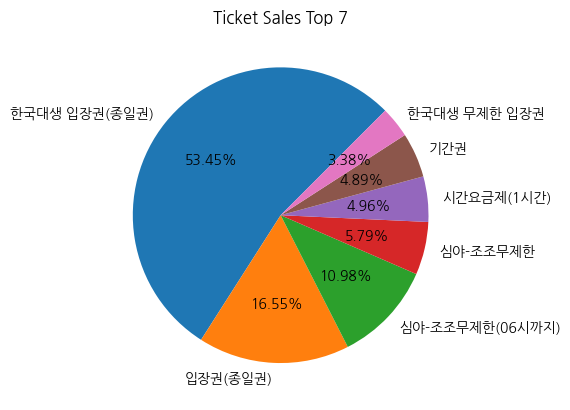

In [17]:
entry_counts = temp_var.groupby('요금제명')['금액'].count().sort_values(ascending=False).head(7)
plt.pie( x=entry_counts, labels=entry_counts.index, autopct='%.2f%%', startangle=45)
plt.title('Ticket Sales Top 7')
plt.show()